
## Lead Scoring Case Study DS C41

1. Abhijit Bhavsar (abhijit@madpixels.in)
2. Renuka Kulkarni (kulkarnirenuka427@gmail.com)

#### Goals of the case study

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

#### Results Expected
A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.
The word document filled with solutions to all the problems.
The overall approach of the analysis in a presentation
Mention the problem statement and the analysis approach briefly 
Explain the results in business terms
Include visualisations and summarise the most important results in the presentation
A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.




## Step 1: Reading and Understanding the Data

importing necessary libraries and dataset

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [130]:
xedu = pd.read_csv('Leads.csv')

In [131]:
xedu.head(100)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,62b4ee1c-1071-42bb-b50d-16412c2acce2,659562,Landing Page Submission,Direct Traffic,No,No,0,4.0,161,2.0,Unreachable,India,Marketing Management,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Busy,Not Sure,No,No,Select,Select,03.Low,01.High,12.0,17.0,No,No,Unreachable
96,7f0c404f-3b2d-4d0e-b5e6-cc5bb0bab65d,659555,Landing Page Submission,Google,No,No,0,2.0,511,2.0,Form Submitted on Website,India,Healthcare Management,Student of SomeSchool,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Diploma holder (Not Eligible),NaN,No,No,Select,Mumbai,03.Low,02.Medium,9.0,15.0,No,No,Modified
97,477c8243-bd09-48f5-a170-a5aa9001ab12,659545,API,Olark Chat,No,No,0,0.0,0,0.0,Olark Chat Conversation,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,opp hangup,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
98,bc35eede-4208-461c-827e-11108a378df7,659523,API,Google,No,No,1,5.0,1110,5.0,Olark Chat Conversation,India,Human Resource Management,Select,Working Professional,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Select,01.High,02.Medium,16.0,16.0,No,No,Modified


In [132]:
xedu.shape

(9240, 37)

In [133]:
xedu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- There are quite a few null values.
- There are no invalid datatypes.

## Step 2: Data cleaning and EDA
### Data Sanity Check
We will check data for missing values,invalid values.

In [134]:
#checking for null values in dataframe(in percentage)
round(xedu.isnull().sum()/len(xedu)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

#### Converting Select to Null values
- Based on our data collection understanding, value 'Select' represents user chose not to answer that particular question. Thus, It is infact missing value for us. 

In [135]:
# Replacing 'Select' with None.
xedu = xedu.replace(to_replace ='Select', value = None , regex = True)

In [136]:
#ReChecking for null values in dataframe(in percentage)
round(xedu.isnull().sum()/len(xedu)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

### Preliminary Column Drop
- Dropping the columns with more than 45% null values
- Dropping the columns with are irrelevant for us.

In [137]:
#dropping the null values which are more than 45%
xedu.drop(['How did you hear about X Education', 'Lead Profile', 'Asymmetrique Profile Score','Asymmetrique Activity Score', 'Asymmetrique Profile Index', 'Asymmetrique Activity Index' , 'Lead Quality'], axis=1, inplace=True)


In [138]:
#dropping irrelvant columns
xedu.drop(['Prospect ID','Lead Number'], axis=1, inplace=True)

### Treating Null Values 

In [139]:
#treating the null values

xedu['What matters most to you in choosing a course'].value_counts(dropna = False)/len(xedu)*100

Better Career Prospects      70.649351
NaN                          29.318182
Flexibility & Convenience     0.021645
Other                         0.010823
Name: What matters most to you in choosing a course, dtype: float64

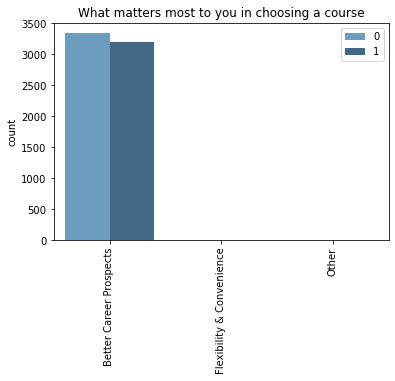

In [140]:
sns.countplot(x = 'What matters most to you in choosing a course', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('What matters most to you in choosing a course')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

Majority of people looking for education for 'Better Career', However this data has no significant relevance for our model building.

In [141]:
#Dropping 'What matters most to you in choosing a course' column

xedu.drop(['What matters most to you in choosing a course'],axis=1, inplace=True)

In [142]:
#Checking What is your current occupation column
xedu['What is your current occupation'].value_counts(dropna = False)/len(xedu)*100

Unemployed              60.606061
NaN                     29.112554
Working Professional     7.640693
Student                  2.272727
Other                    0.173160
Housewife                0.108225
Businessman              0.086580
Name: What is your current occupation, dtype: float64

In [143]:
#Converting Null values in Occupation to 'Other'
xedu['What is your current occupation'] = xedu['What is your current occupation'].fillna('Other')

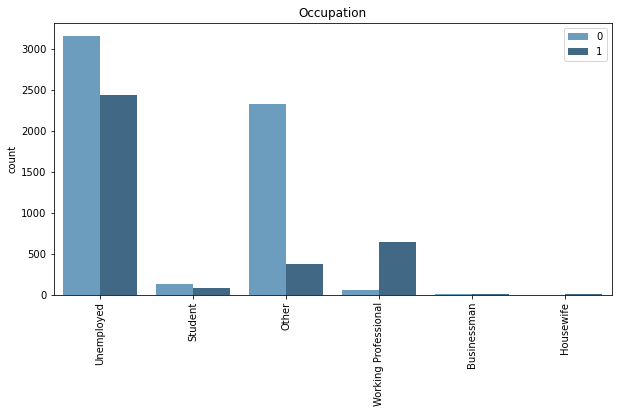

In [144]:
#visualising occupation against target variable 

plt.figure(figsize=(10, 5)) 
sns.countplot(x = 'What is your current occupation', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Occupation')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [145]:
#checking country column
xedu['Country'].value_counts(dropna = False)/len(xedu)*100

India                   70.259740
NaN                     26.634199
United States            0.746753
United Arab Emirates     0.573593
Singapore                0.259740
Saudi Arabia             0.227273
United Kingdom           0.162338
Australia                0.140693
Qatar                    0.108225
Bahrain                  0.075758
Hong Kong                0.075758
Oman                     0.064935
France                   0.064935
unknown                  0.054113
Kuwait                   0.043290
South Africa             0.043290
Canada                   0.043290
Nigeria                  0.043290
Germany                  0.043290
Sweden                   0.032468
Philippines              0.021645
Uganda                   0.021645
Italy                    0.021645
Bangladesh               0.021645
Netherlands              0.021645
Asia/Pacific Region      0.021645
China                    0.021645
Belgium                  0.021645
Ghana                    0.021645
Kenya         

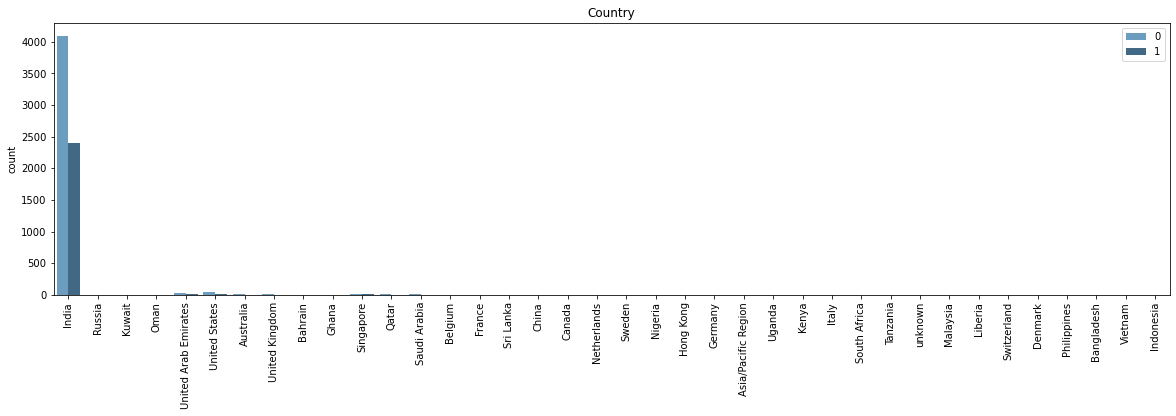

In [146]:
#visualising country against target variable 

plt.figure(figsize=(20, 5)) 
sns.countplot(x = 'Country', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Country')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

#### Only 4% is from other countries and majority is from India.

In [147]:
#Dropping the Country column

xedu.drop(['Country'], axis=1, inplace=True)

In [148]:
#checking tags in column

xedu['Tags'].value_counts(dropna = False)/len(xedu)*100

NaN                                                  36.287879
Will revert after reading the email                  22.424242
Ringing                                              13.019481
Interested in other courses                           5.551948
Already a student                                     5.032468
Closed by Horizzon                                    3.874459
switched off                                          2.597403
Busy                                                  2.012987
Lost to EINS                                          1.893939
Not doing further education                           1.569264
Interested  in full time MBA                          1.266234
Graduation in progress                                1.201299
invalid number                                        0.898268
Diploma holder (Not Eligible)                         0.681818
wrong number given                                    0.508658
opp hangup                                            0

- Tags has a lot of categories which constitutes less than 5%, Merging those as 'Other'
- Tags has Null values stored as Nan, Merging those to 'Other'

In [149]:
#replacing values as others for categories with share less than 5% in total values

xedu['Tags'] = xedu['Tags'].replace(['Lost to EINS',
       'In confusion whether part time or DLP', 'Busy', 'switched off',
       'in touch with EINS',
       'Diploma holder (Not Eligible)', 'Graduation in progress',
       'Closed by Horizzon', 'number not provided', 'opp hangup',
       'Not doing further education', 'invalid number',
       'wrong number given', 'Interested  in full time MBA',
       'Still Thinking', 'Lost to Others',
       'Shall take in the next coming month', 'Lateral student',
       'Interested in Next batch', 'Recognition issue (DEC approval)',
       'Want to take admission but has financial problems',
       'University not recognized'],'Other')

In [150]:
#treating the null values in Tags

xedu.Tags = xedu.Tags.fillna('Other')

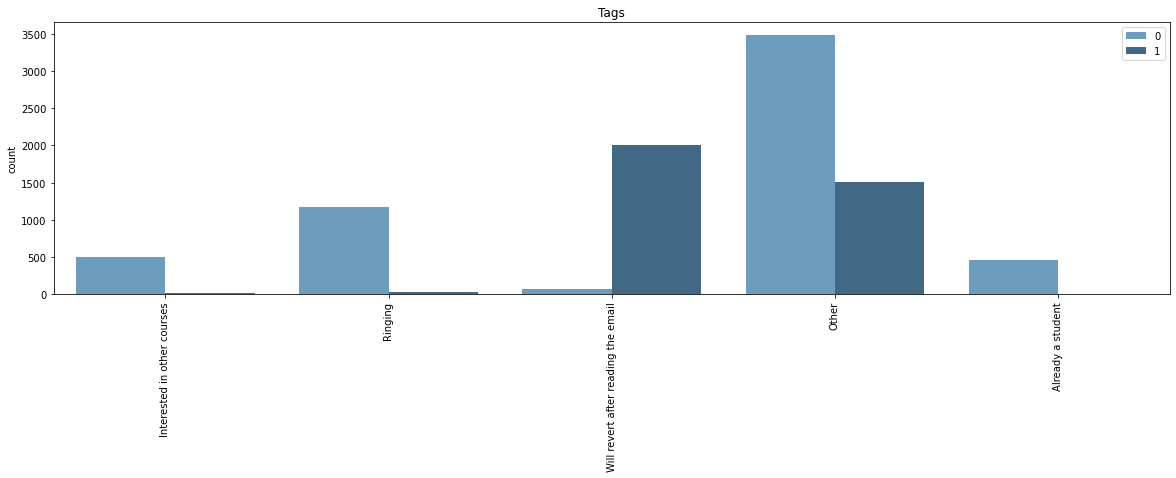

In [151]:
#visualising tags against target variable 

plt.figure(figsize=(20, 5)) 
sns.countplot(x = 'Tags', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Tags')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [152]:
#checking city column

round(xedu['City'].astype('category').value_counts(dropna=False)/len(xedu)*100)

NaN                            40.0
Mumbai                         35.0
Thane & Outskirts               8.0
Other Cities                    7.0
Other Cities of Maharashtra     5.0
Other Metro Cities              4.0
Tier II Cities                  1.0
Name: City, dtype: float64

- 40% of values in 'City' are null values. There are already 3 types of other categories. Imputing Null in any one of those will skew our data. 

- Since 40% is substancial amount of location data. which can be used for targeted marketing purpose. It is unwise to ignore.
- let's create new column 'Location not provided' 

In [153]:
#filling NA values with Location not provided

xedu['City'] = xedu['City'].fillna('Location not provided')

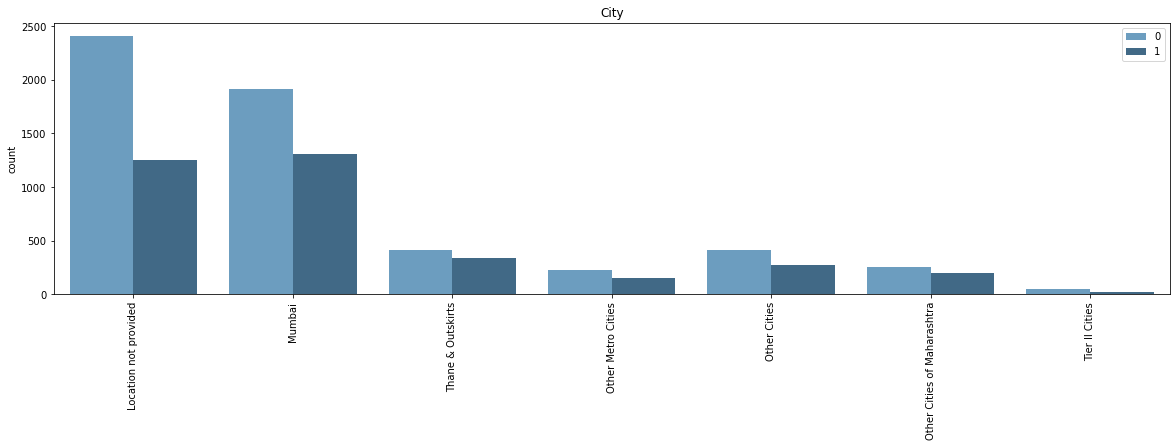

In [154]:
#visualising city against target variable 

plt.figure(figsize=(20, 5)) 

sns.countplot(x = 'City', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('City')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [155]:
#checking specialisation column

round(xedu['Specialization'].astype('category').value_counts(dropna=False)/len(xedu)*100)

NaN                                  37.0
Finance Management                   11.0
Human Resource Management             9.0
Marketing Management                  9.0
Operations Management                 5.0
Business Administration               4.0
IT Projects Management                4.0
Supply Chain Management               4.0
Banking, Investment And Insurance     4.0
Media and Advertising                 2.0
Travel and Tourism                    2.0
International Business                2.0
Healthcare Management                 2.0
Hospitality Management                1.0
E-COMMERCE                            1.0
Retail Management                     1.0
Rural and Agribusiness                1.0
E-Business                            1.0
Services Excellence                   0.0
Name: Specialization, dtype: float64

- There are too many categories which are less than 5%, Let's combine overlapping categories.
- 37% values are missing, Let's categories that as 'others'.

In [156]:
#clubbing the specialisation based on broad sectors and replacing null values as others

xedu['Specialization'] = xedu['Specialization'].replace([
       'Finance Management',
       'Banking, Investment And Insurance'],'Banking, financial services & insurance')

xedu['Specialization'] = xedu['Specialization'].replace([
       'Business Administration',
       'International Business', 'E-Business', ],'Business Management')

xedu['Specialization'] = xedu['Specialization'].replace([
       'Media and Advertising' ],'Marketing Management')

xedu['Specialization'] = xedu['Specialization'].replace([
       'Retail Management', 'E-COMMERCE' ],'Retail & E-Commerce')

xedu['Specialization'] = xedu['Specialization'].replace([
       'Supply Chain Management' ],'Operations Management')

xedu['Specialization'] = xedu['Specialization'].replace([
       'Hospitality Management' ],'Travel and Tourism')

xedu['Specialization'] = xedu['Specialization'].replace([
       None, 'NaN' , 'Rural and Agribusiness', 'Services Excellence' ],'Others')



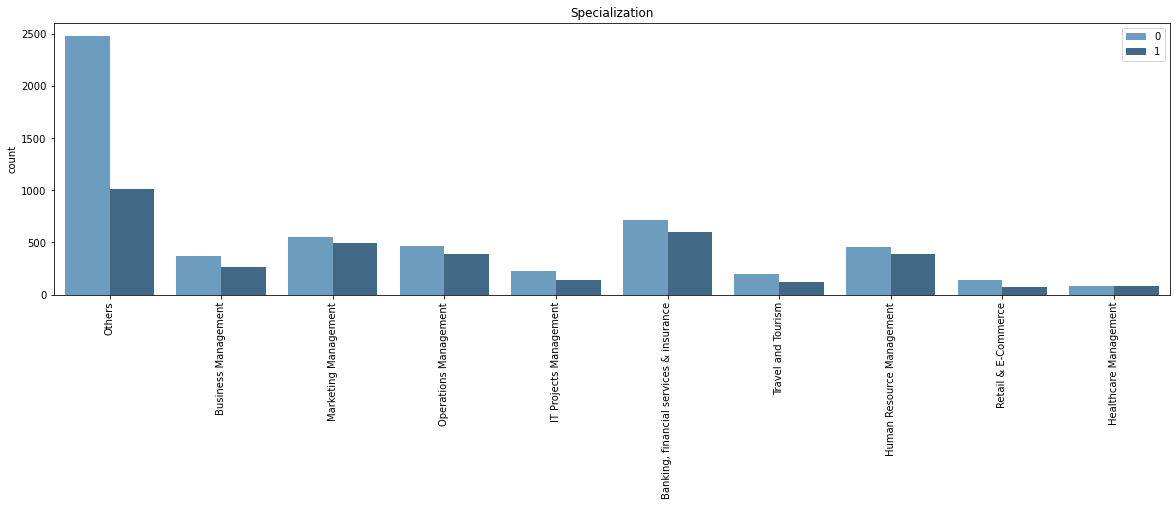

In [157]:
#visualising specialization against target variable 

plt.figure(figsize=(20, 5)) 

sns.countplot(x = 'Specialization', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Specialization')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [158]:
#checking lead source column

xedu['Lead Source'].value_counts(dropna = False)/len(xedu)*100

Google               31.038961
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
NaN                   0.389610
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.010823
blog                  0.010823
NC_EDM                0.010823
Name: Lead Source, dtype: float64

In [159]:
# Clubbinng repreative value
xedu['Lead Source'] = xedu['Lead Source'].replace(['google'],'Google')

#clubbing the values having less that 2% share as others and treating null values

xedu['Lead Source'] = xedu['Lead Source'].replace(['Welingak Website','Referral Sites','Facebook','bing','Click2call', 'Press_Release', 'Social Media', 'Live Chat', 'WeLearn', 'Pay per Click Ads', 'NC_EDM', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Other')

xedu['Lead Source'] = xedu['Lead Source'].fillna('Other')

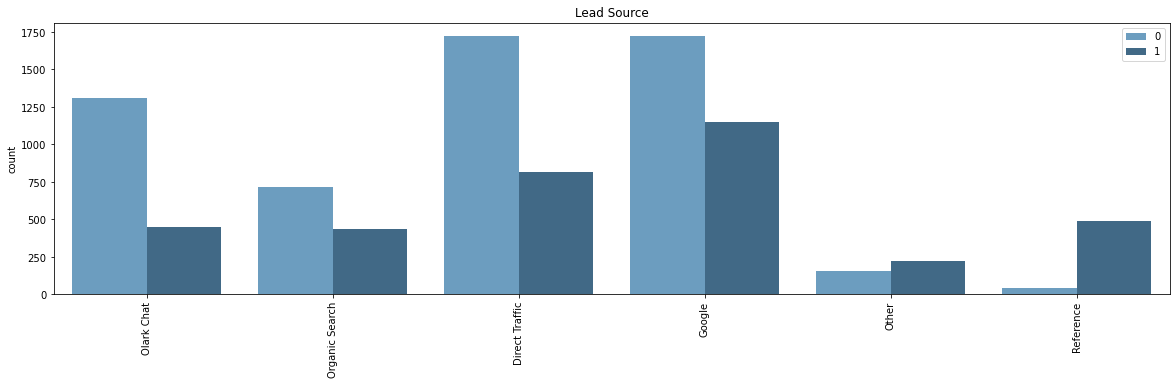

In [160]:
#visualising lead source against target variable

plt.figure(figsize=(20, 5)) 

sns.countplot(x = 'Lead Source', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Lead Source')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.show()

In [161]:
#checking lead activity
xedu['Last Activity'].value_counts(dropna = False)/len(xedu)*100

Email Opened                    37.196970
SMS Sent                        29.707792
Olark Chat Conversation         10.530303
Page Visited on Website          6.926407
Converted to Lead                4.632035
Email Bounced                    3.528139
Email Link Clicked               2.889610
Form Submitted on Website        1.255411
NaN                              1.114719
Unreachable                      1.006494
Unsubscribed                     0.660173
Had a Phone Conversation         0.324675
Approached upfront               0.097403
View in browser link Clicked     0.064935
Email Received                   0.021645
Email Marked Spam                0.021645
Visited Booth in Tradeshow       0.010823
Resubscribed to emails           0.010823
Name: Last Activity, dtype: float64

- There are too many categories which are less than 5%, Let's combine overlapping categories.
- Some values are missing, Let's categories that as 'others'.

In [162]:
#Converting insignificant values to Others
xedu['Last Activity'] = xedu['Last Activity'].replace(['Unreachable',
       'Converted to Lead', 'Email Bounced',
       'Email Link Clicked', 'Form Submitted on Website', 'Unsubscribed',
       'Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'Visited Booth in Tradeshow',
       'Resubscribed to emails', 'Email Received', 'Email Marked Spam'], 'Other')

In [163]:
#Converting Null values to Others
xedu['Last Activity'] = xedu['Last Activity'].fillna('Other')

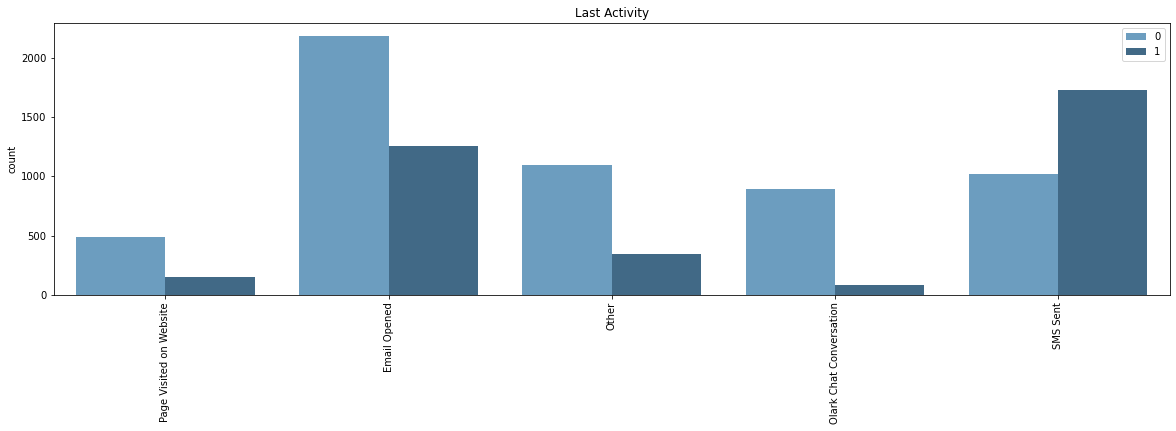

In [164]:
#visualising lead Activity against target variable

plt.figure(figsize=(20, 5)) 

sns.countplot(x = 'Last Activity', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Last Activity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

In [165]:
#checking lead activity
xedu['Lead Origin'].value_counts(dropna = False)/len(xedu)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

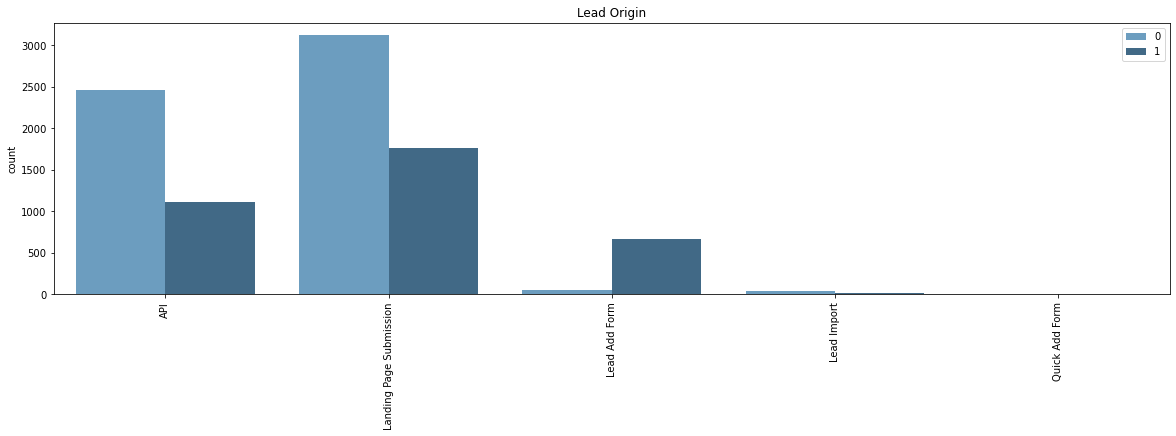

In [166]:
#visualising lead Origin against target variable

plt.figure(figsize=(20, 5)) 

sns.countplot(x = 'Lead Origin', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Lead Origin')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

#### There are still missing values in Continous numerical variables, Let's impute those

In [167]:
#replacing missing value with median
xedu['TotalVisits'].fillna(xedu['TotalVisits'].median(), inplace = True)

In [168]:
#replacing missing value with median
xedu['Page Views Per Visit'].fillna(xedu['Page Views Per Visit'].median(), inplace = True)

### Handling Outliers


In [169]:
#Checking the dataframe for outliers
xedu.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [170]:
#Checking the difference between 95th and 99.9th percentile value in Total Visit per lead
print('95% leads visited', round(xedu.TotalVisits.quantile(0.95)),'times.')
print( '99% leads visited', round(xedu.TotalVisits.quantile(0.999)),'times.')

#Checking the difference between 95th and 99.9th percentile value in Total Time Spent on Website per lead
print('95% leads spent', round(xedu['Total Time Spent on Website'].quantile(0.95)),'seconds.')
print('99% leads spent', round(xedu['Total Time Spent on Website'].quantile(0.999)),'seconds.')

#Checking the difference between 95th and 99.9th percentile value in page views per visit
print('95% leads views', round(xedu['Page Views Per Visit'].quantile(0.95)),'pages per visit.')
print( '99% leads views', round(xedu['Page Views Per Visit'].quantile(0.999)), 'pages per visit.')

95% leads visited 10 times.
99% leads visited 32 times.
95% leads spent 1562 seconds.
99% leads spent 2116 seconds.
95% leads views 6 pages per visit.
99% leads views 14 pages per visit.


##### As we can see there is quite a lot difference between 95th and 99.9th percentile.

Any lead/user activity past 99.9th percentile mark is rare behaviour and we can safely modify those records to max value of 99.9th percetile. 

This will not have significant impact on our analysis.

In [171]:
#cliping the outlier values based on the percentiles 

p_01 = xedu['TotalVisits'].quantile(0.01) 
p_95 = xedu['TotalVisits'].quantile(0.95) 

xedu['TotalVisits'].clip(p_01, p_95, inplace=True)

p_01 = xedu['Total Time Spent on Website'].quantile(0.01) 
p_95 = xedu['Total Time Spent on Website'].quantile(0.95) 

xedu['Total Time Spent on Website'].clip(p_01, p_95, inplace=True)

p_01 = xedu['Page Views Per Visit'].quantile(0.01) 
p_95 = xedu['Page Views Per Visit'].quantile(0.95) 

xedu['Page Views Per Visit'].clip(p_01, p_95, inplace=True)

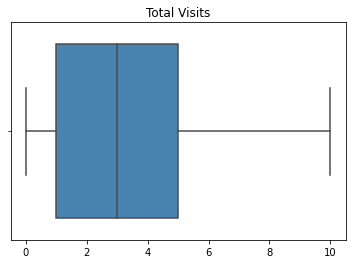

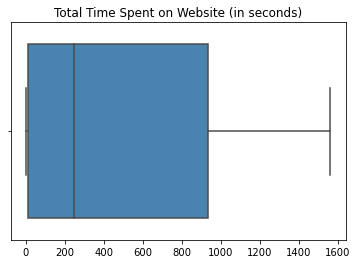

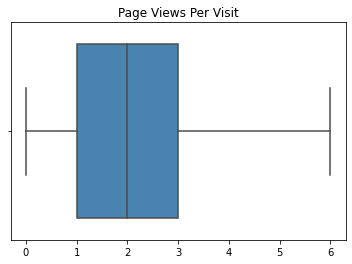

In [172]:
#Checking the outliers by plotting visually

sns.boxplot(xedu['TotalVisits'], palette = 'Blues_d')
plt.title('Total Visits')
plt.xlabel('')
plt.show()

sns.boxplot(xedu['Total Time Spent on Website'], palette = 'Blues_d')
plt.title('Total Time Spent on Website (in seconds)')
plt.xlabel('')
plt.show()

sns.boxplot(xedu['Page Views Per Visit'], palette = 'Blues_d')
plt.title('Page Views Per Visit')
plt.xlabel('')
plt.show()

## Exploratory Data Analysis

Categorising the variables:

1. Target (Dependent) Variable: 
Converted


2. Independent categorical variables:
Lead origin, Lead source, Last Activity, Country, Specialization, What is your current occupation, What matters most to you in choosing a course, Search 	Magazine, Newspaper Article, X Education Forums, Newspaper 	Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Tags, Update me on Supply Chain Content, Get updates on DM Content , City , I agree to pay the amount through cheque , A free copy of Mastering The Interview , Last Notable Activity


3. Independent continuous variables:
TotalVisits, Total Time Spent on Website, Page Views Per Visit


#### Visualising categorical and continuous variables against target variable

#### Demographic indicators

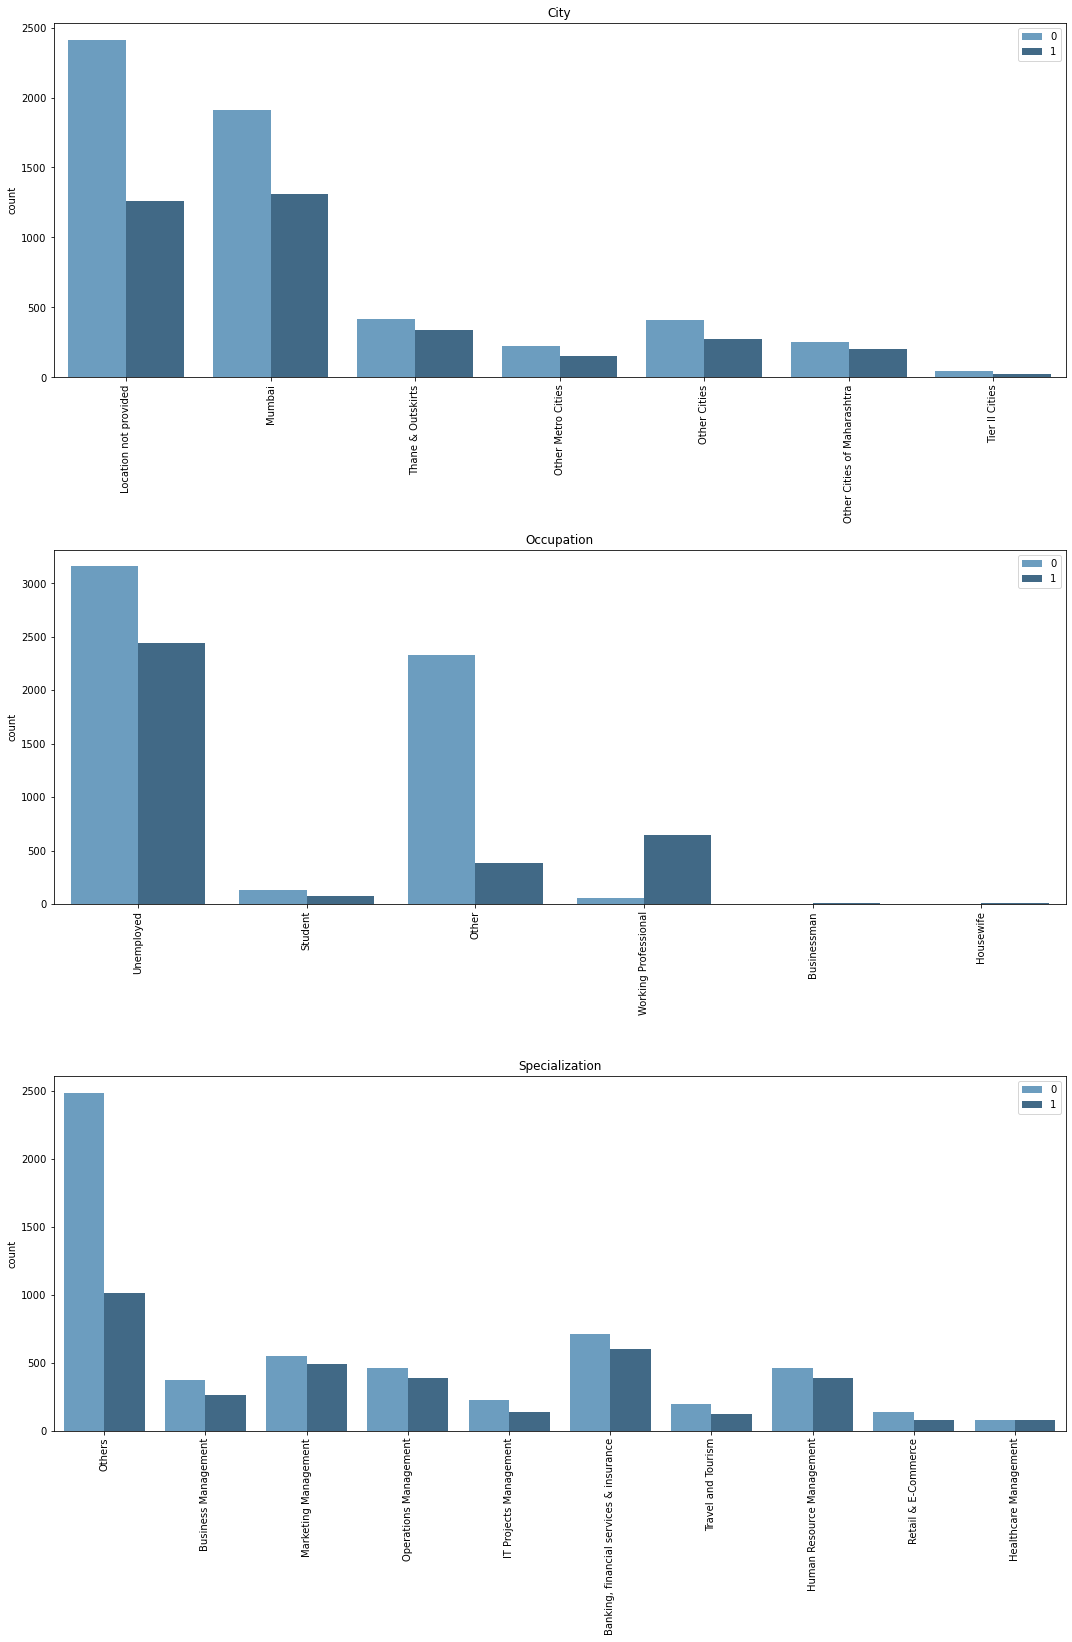

In [173]:
plt.figure(figsize=(15, 30)) 

plt.subplot(4,1,2)
sns.countplot(x = 'City', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('City')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.subplot(4,1,3)
sns.countplot(x = 'What is your current occupation', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Occupation')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.subplot(4,1,4)
sns.countplot(x = 'Specialization', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Specialization')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')


plt.tight_layout()
plt.show()



#### Inference
1. Majority of the converted leads are from India and are concentrated in areas of Mumbai and Thane district in Mumbai Metropolitan Region.
2. Occupation wise, unemployed people are mostly inclined to opt for the courses, followed by working professionals.
3. Such individuals have specialisation in Banking, financial services and insurance (BFSI), Human Resource Managment, Marketing and Operations.

#### Customer Behaviour
The following analysis is done to understand the behaviour of the people visiting the website and dropping the leads, i.e the source of lead, understanding the modes of references to the website (newspaper, magzine etc)

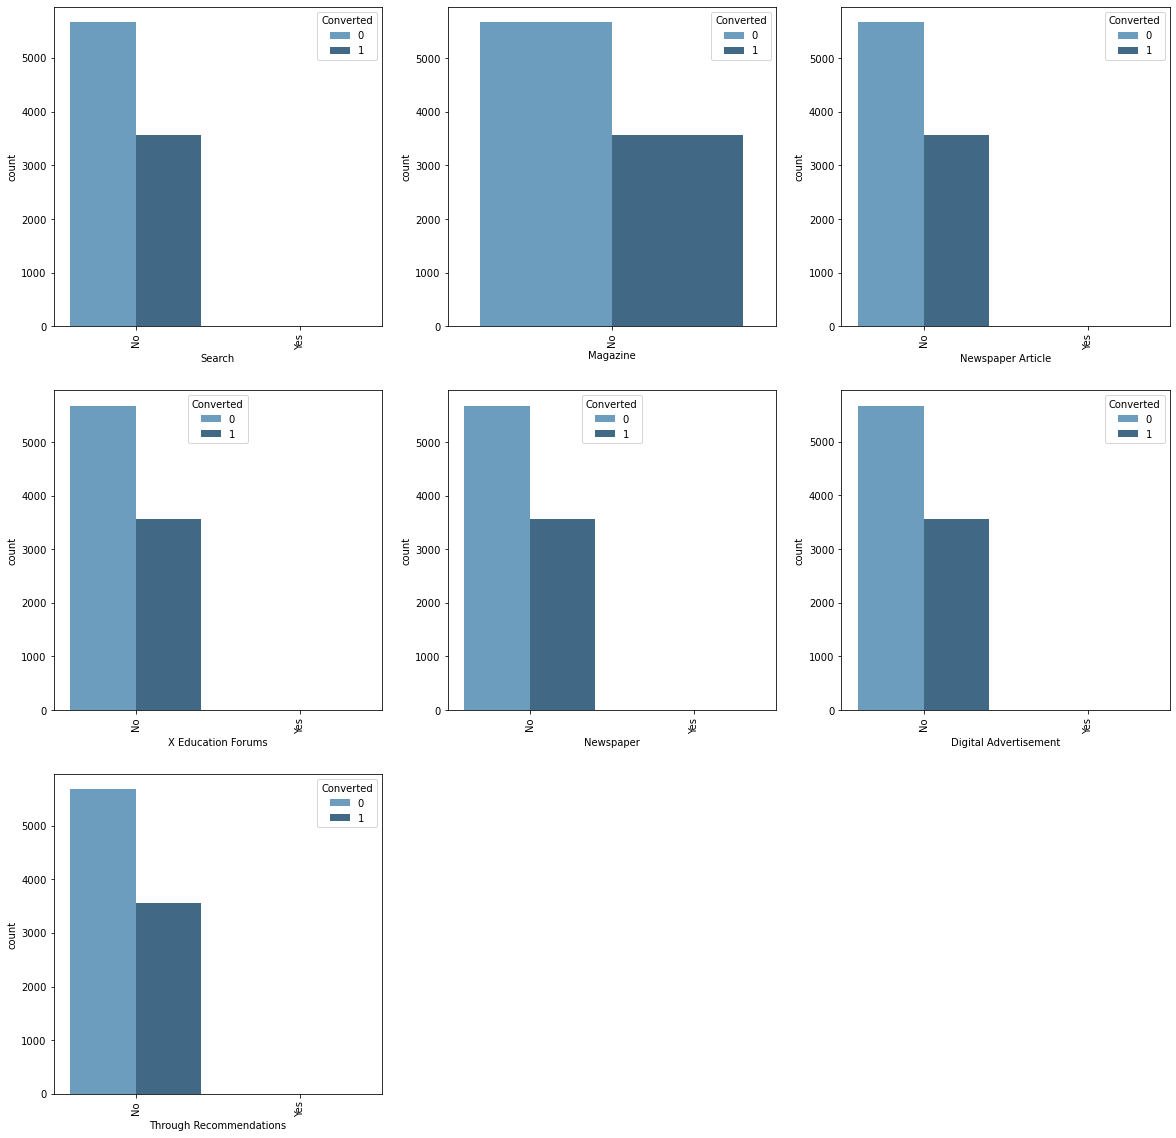

In [174]:
# understanding whether the customer had seen the ad in any of the listed items.
plt.figure(figsize=(20, 20)) 
plt.subplot(3,3,1)
sns.countplot(x = 'Search', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.xticks(rotation=90)

plt.subplot(3,3,2)
sns.countplot(x = 'Magazine', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.xticks(rotation=90)

plt.subplot(3,3,3)
sns.countplot(x = 'Newspaper Article', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.xticks(rotation=90)

plt.subplot(3,3,4)
sns.countplot(x = 'X Education Forums', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.xticks(rotation=90)

plt.subplot(3,3,5)
sns.countplot(x = 'Newspaper', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.xticks(rotation=90)

plt.subplot(3,3,6)
sns.countplot(x = 'Digital Advertisement', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.xticks(rotation=90)

plt.subplot(3,3,7)
sns.countplot(x = 'Through Recommendations', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.xticks(rotation=90)

plt.show()

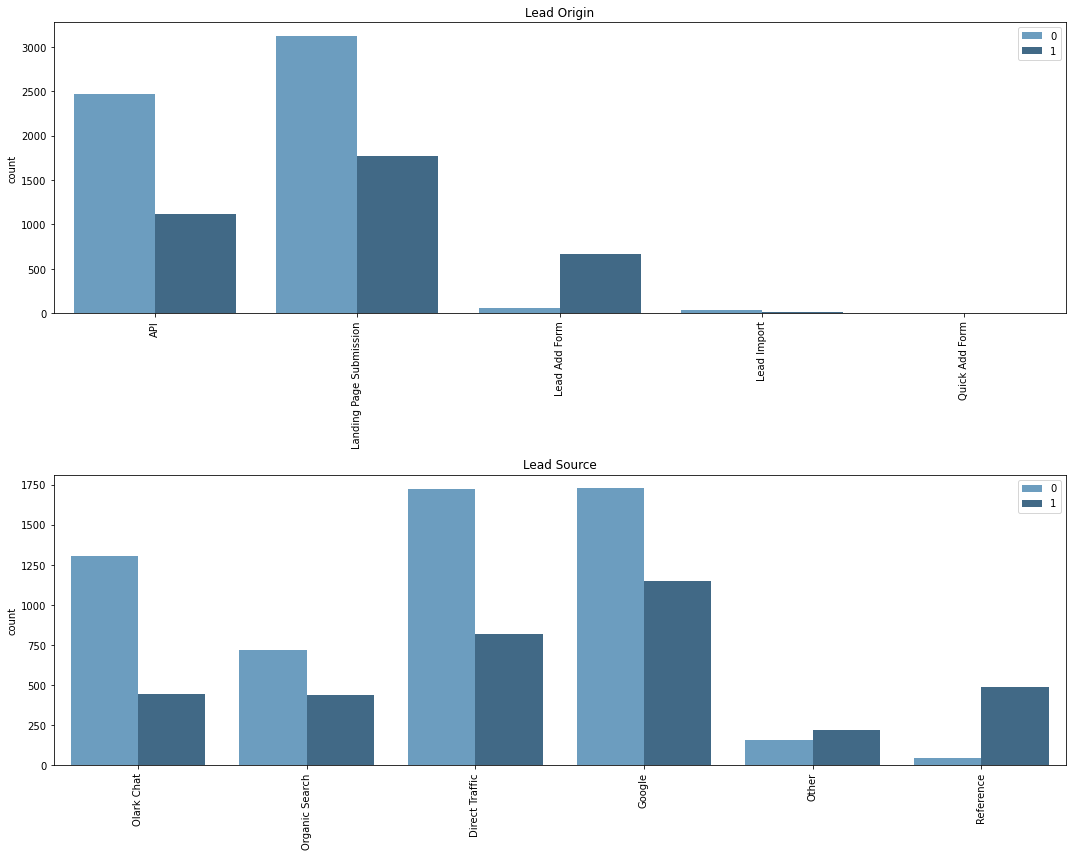

In [175]:
# Lead origin and source

plt.figure(figsize=(15, 12)) 

plt.subplot(2,1,1)
sns.countplot(x = 'Lead Origin', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Lead Origin')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.subplot(2,1,2)
sns.countplot(x = 'Lead Source', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Lead Source')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

#### Inference:
1. Majority of the converted leads are via the landing page submission
2. In terms of lead sources, maximum converted leads are from google, followed by direct and organic search (positive indicator), references and olark chat. 

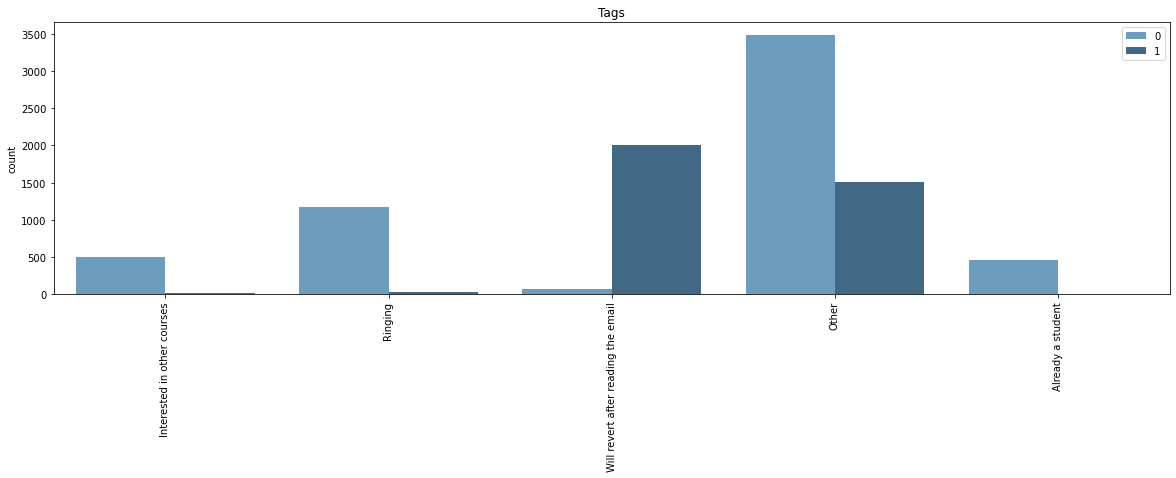

In [176]:
# checking the tags 
plt.figure(figsize=(20, 5)) 

sns.countplot(x = 'Tags', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Tags')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.show()

#### Inference
Interest in receiving email is a good indicator of a lead getting converted. Majority of the customers who decided they will revert post reading the email have converted as a lead. 

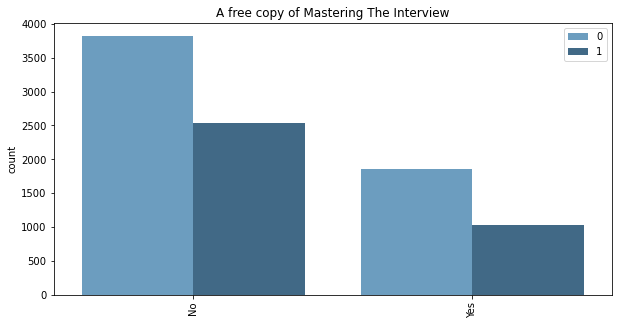

In [177]:
# checking if interest in getting a free copy of mastering the interview indicate a positive customer behaviour
plt.figure(figsize=(10, 5)) 

sns.countplot(x = 'A free copy of Mastering The Interview', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('A free copy of Mastering The Interview')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.show()

In [178]:
#a free copy of mastering the interview does not have any significant impact on lead conversion, hence dropping the column.
xedu.drop(['A free copy of Mastering The Interview'], axis = 1, inplace = True)

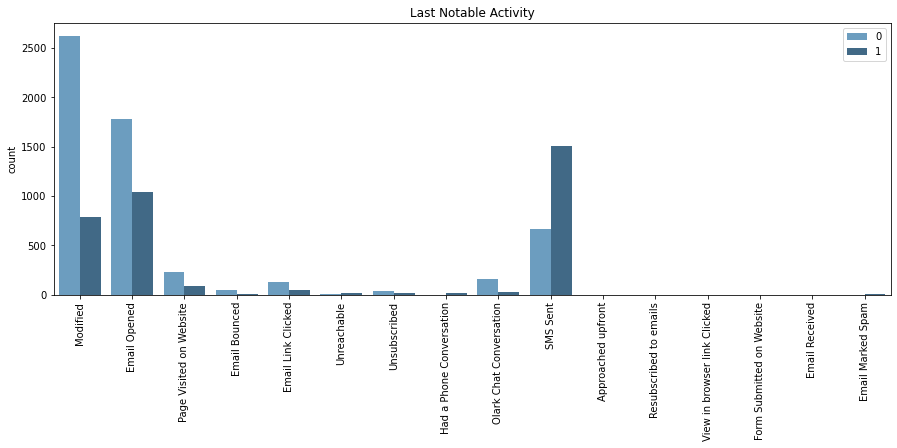

In [179]:
#last notable activity

plt.figure(figsize=(15, 5)) 

sns.countplot(x = 'Last Notable Activity', data = xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Last Notable Activity')
plt.xlabel('')
plt.xticks(rotation=90)
plt.legend(loc='upper right')

plt.show()

In [180]:
xedu['Last Notable Activity'].value_counts(dropna = False)/len(xedu)*100

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [181]:
xedu['Last Notable Activity'] = xedu['Last Notable Activity'].replace(['Page Visited on Website',
       'Email Bounced', 'Email Link Clicked', 'Unreachable',
       'Unsubscribed', 'Had a Phone Conversation',
       'Olark Chat Conversation', 'Approached upfront',
       'Resubscribed to emails', 'View in browser link Clicked',
       'Form Submitted on Website', 'Email Received', 'Email Marked Spam'],'Others')

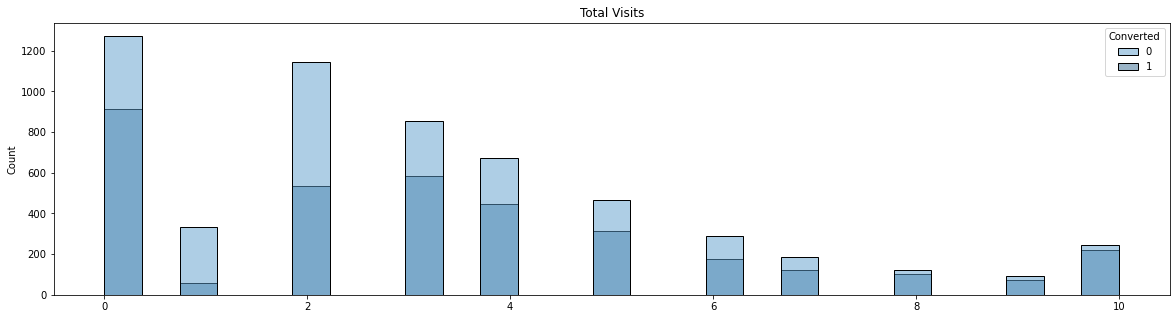

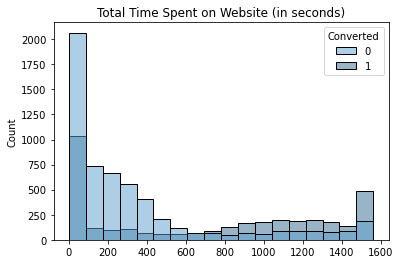

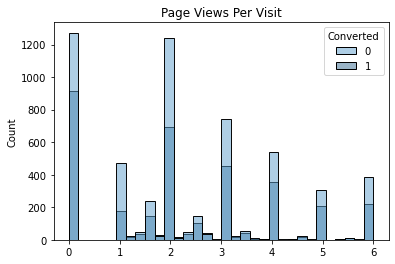

In [182]:
#checking continuous varibales against target variable

plt.figure(figsize=(20, 5)) 

sns.histplot( x='TotalVisits', data=xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Total Visits')
plt.xlabel('')
plt.show()


sns.histplot( x="Total Time Spent on Website", data=xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Total Time Spent on Website (in seconds)')
plt.xlabel('')
plt.show()


sns.histplot( x='Page Views Per Visit', data=xedu, hue = 'Converted', palette = 'Blues_d')
plt.title('Page Views Per Visit')
plt.xlabel('')
plt.show()

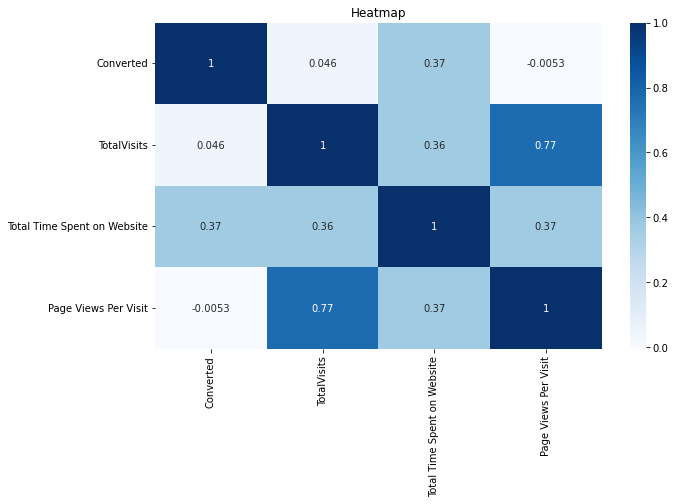

In [183]:
#correlation analysis of variables

plt.figure(figsize=(10,6))
sns.heatmap(xedu.corr(), annot=True, cmap='Blues')
plt.title('Heatmap')
plt.show()

## Creating dummy variable

In [184]:
#checking the columns again to check for dummy variables
xedu.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Location not provided,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Location not provided,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Business Management,Student,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Other,Marketing Management,Unemployed,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Other,Others,Unemployed,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Modified


In [185]:
xedu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Lead Origin                               9240 non-null   object 
 1   Lead Source                               9240 non-null   object 
 2   Do Not Email                              9240 non-null   object 
 3   Do Not Call                               9240 non-null   object 
 4   Converted                                 9240 non-null   int64  
 5   TotalVisits                               9240 non-null   float64
 6   Total Time Spent on Website               9240 non-null   float64
 7   Page Views Per Visit                      9240 non-null   float64
 8   Last Activity                             9240 non-null   object 
 9   Specialization                            9240 non-null   object 
 10  What is your current occupation     

In [186]:
list(xedu.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'Last Notable Activity']

In [187]:
# converting columns with data type as object into dummy variables

xedu = pd.get_dummies(data=xedu,columns=['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'I agree to pay the amount through cheque',
 'Last Notable Activity'], drop_first=True)

In [188]:
#checking the dataframe 
list(xedu.columns)

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Lead Origin_Landing Page Submission',
 'Lead Origin_Lead Add Form',
 'Lead Origin_Lead Import',
 'Lead Origin_Quick Add Form',
 'Lead Source_Google',
 'Lead Source_Olark Chat',
 'Lead Source_Organic Search',
 'Lead Source_Other',
 'Lead Source_Reference',
 'Do Not Email_Yes',
 'Do Not Call_Yes',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_Other',
 'Last Activity_Page Visited on Website',
 'Last Activity_SMS Sent',
 'Specialization_Business Management',
 'Specialization_Healthcare Management',
 'Specialization_Human Resource Management',
 'Specialization_IT Projects Management',
 'Specialization_Marketing Management',
 'Specialization_Operations Management',
 'Specialization_Others',
 'Specialization_Retail & E-Commerce',
 'Specialization_Travel and Tourism',
 'What is your current occupation_Housewife',
 'What is your current occupation_Other',
 'What is your current occupation_Studen

## Splitting the Data into Training and Testing Sets

Let's split the data so we can test our model. 

In [189]:
# Import the required library

from sklearn.model_selection import train_test_split

In [190]:
X = xedu.drop(['Converted'], 1)

In [191]:
# Putting the target variable in y
y = xedu['Converted']

In [192]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [193]:
#checking the train and test data
print(X_train.shape)
print(X_test.shape)

(6468, 51)
(2772, 51)


### Rescaling the Features 

To handle the outliers, We will scale of features using MinMax Scaling.

In [194]:
#importing the libraries
from sklearn.preprocessing import MinMaxScaler

In [195]:
#Using normalisaion (min-max) to scale the data
scaler = MinMaxScaler()

#creating list of numerical varibles for scaling

num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#scale the variables
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [196]:
#checking the variables after scaling
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Retail & E-Commerce,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Interested in other courses,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3112,0.2,0.263764,0.333333,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
8413,0.5,0.980154,0.833333,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
2961,0.3,0.798976,0.166667,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
24,0.6,0.727913,0.250000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2740,0.3,0.642125,0.500000,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [197]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other,Lead Source_Reference,Do Not Email_Yes,Do Not Call_Yes,Last Activity_Olark Chat Conversation,Last Activity_Other,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,Specialization_Retail & E-Commerce,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Search_Yes,Newspaper Article_Yes,X Education Forums_Yes,Newspaper_Yes,Digital Advertisement_Yes,Through Recommendations_Yes,Tags_Interested in other courses,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.00000,6468.000000,6468.000000,6468.000000,6468.0,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.313714,0.305729,0.370844,0.523346,0.079932,0.005566,0.0,0.310761,0.193568,0.123377,0.040507,0.060142,0.079004,0.000309,0.103587,0.155535,0.069419,0.298547,0.069419,0.016234,0.093228,0.036951,0.114409,0.092455,0.382653,0.023346,0.034014,0.000773,0.292672,0.023191,0.60235,0.080241,0.001391,0.000155,0.0,0.000155,0.000464,0.000773,0.058905,0.535560,0.128015,0.229746,0.348949,0.072047,0.050093,0.038652,0.079777,0.007730,0.369821,0.088281,0.237941
std,0.276348,0.338461,0.295402,0.499493,0.271209,0.074403,0.0,0.462841,0.395125,0.328894,0.197161,0.237769,0.269766,0.017583,0.304747,0.362442,0.254184,0.457656,0.254184,0.126383,0.290774,0.188656,0.318332,0.289690,0.486072,0.151011,0.181278,0.027795,0.455024,0.150522,0.48945,0.271687,0.037279,0.012434,0.0,0.012434,0.021533,0.027795,0.235466,0.498772,0.334132,0.420702,0.476675,0.258586,0.218153,0.192779,0.270969,0.087589,0.482793,0.283725,0.425856
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.004481,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.300000,0.160051,0.333333,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

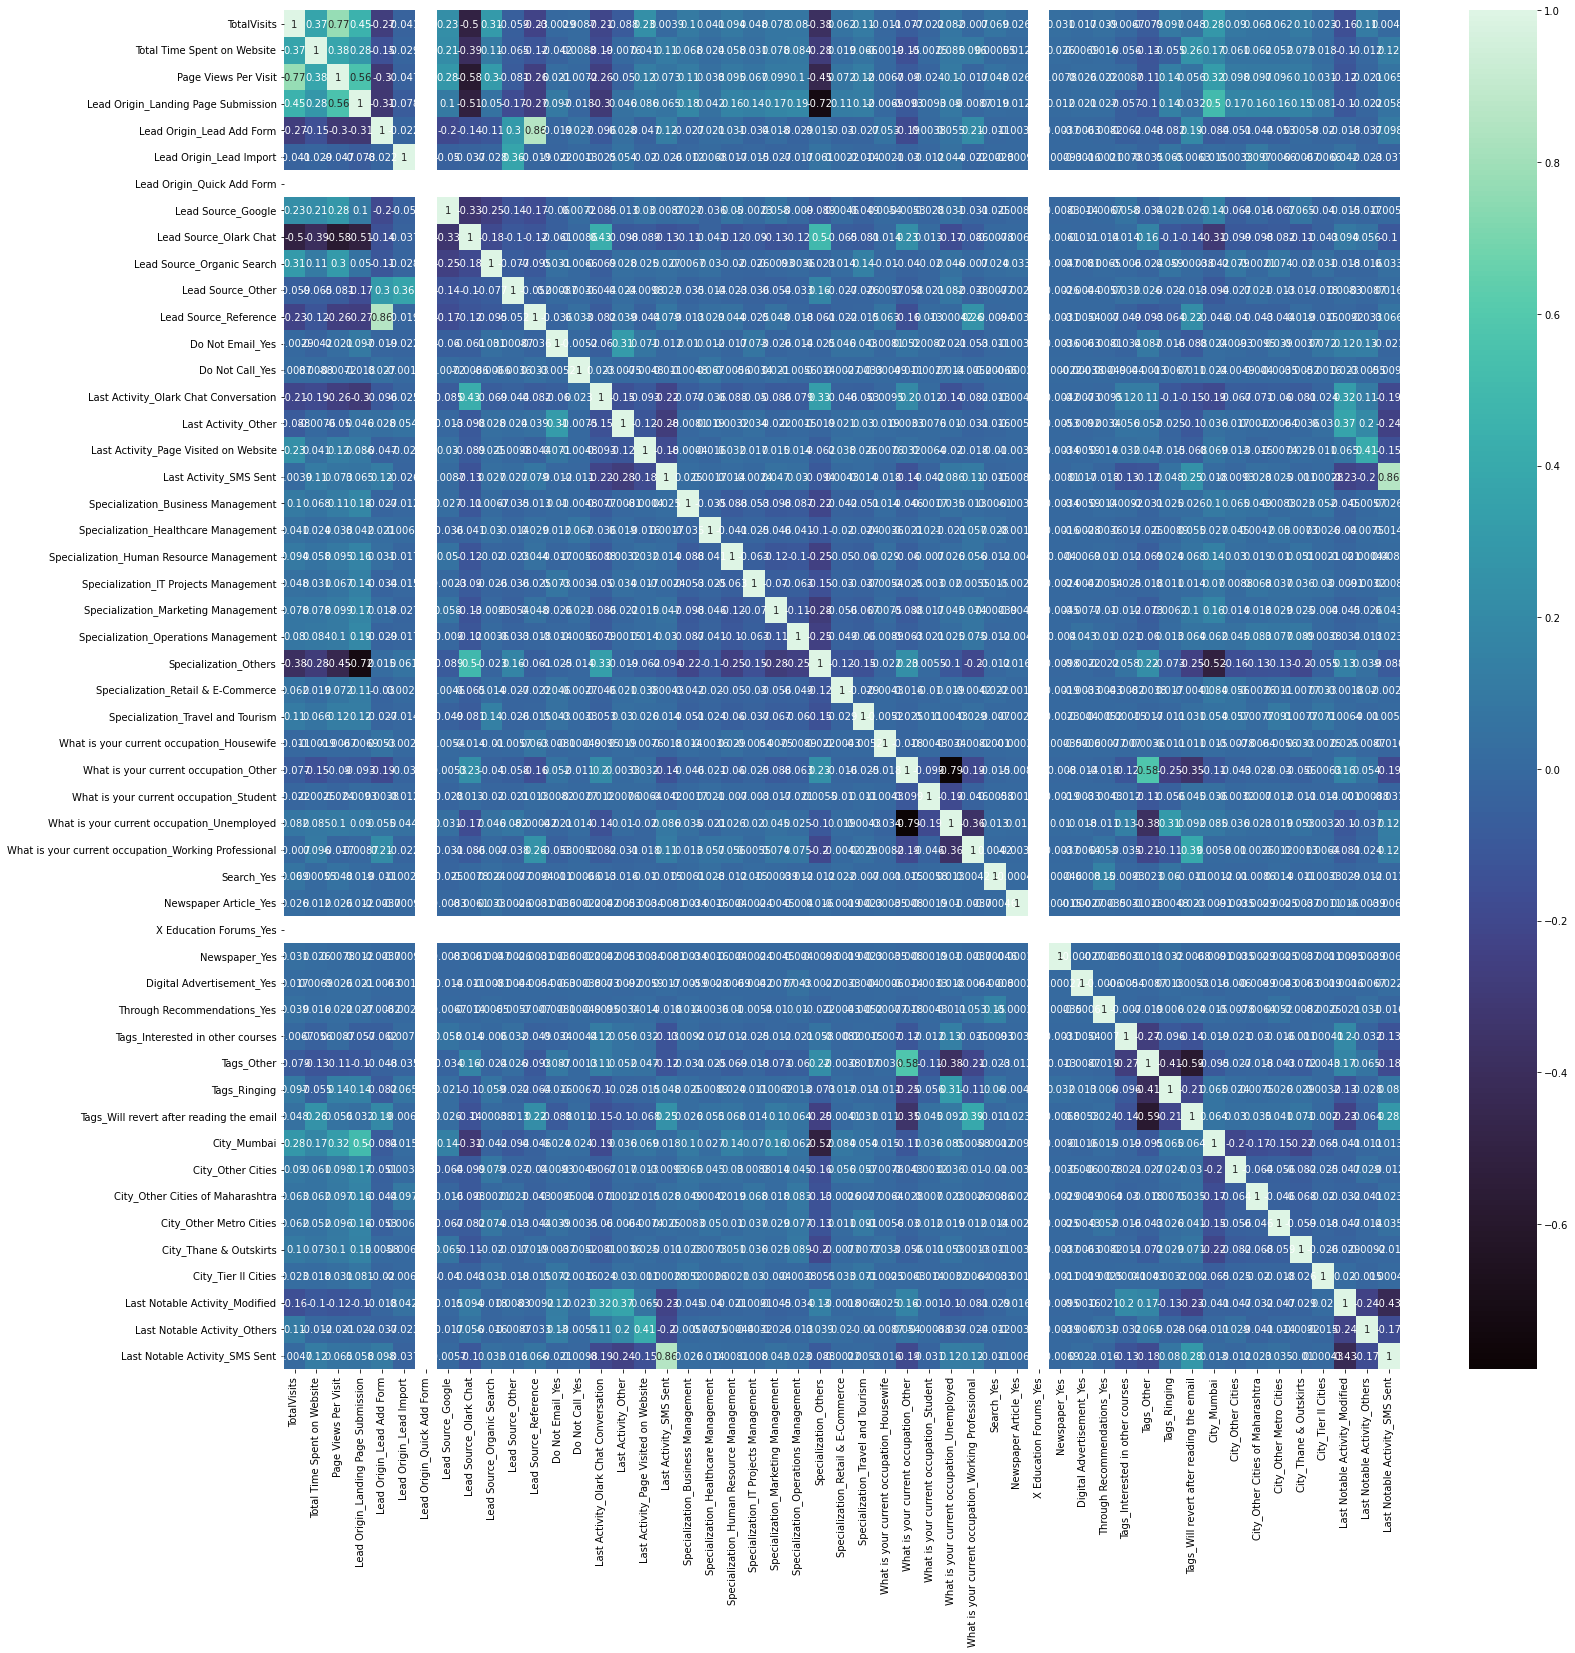

In [198]:
#Checkcing all the features for correaltion
plt.figure(figsize = (25, 25))
sns.heatmap(X_train.corr(), cmap="mako", annot = True)
plt.show()

### Shortlisting significant variables

Shortlisting using Recursive Feature Elimination (RFE) approach.

In [199]:
#importing logistic regression library 

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [200]:
#specifying number of features 

rfe = RFE(logreg,n_features_to_select = 15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [201]:
#checking the list of selected columns and their rankings

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 11),
 ('Lead Origin_Quick Add Form', False, 36),
 ('Lead Source_Google', False, 15),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Other', False, 12),
 ('Lead Source_Reference', False, 24),
 ('Do Not Email_Yes', True, 1),
 ('Do Not Call_Yes', False, 8),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other', True, 1),
 ('Last Activity_Page Visited on Website', False, 2),
 ('Last Activity_SMS Sent', False, 6),
 ('Specialization_Business Management', False, 20),
 ('Specialization_Healthcare Management', False, 32),
 ('Specialization_Human Resource Management', False, 18),
 ('Specialization_IT Projects Management', False, 31),
 ('Specialization_Marketing Management', False, 22),
 ('Spec

In [202]:
#Let's check all the columns selected by RFE
X_train.columns[rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Other', 'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Working Professional', 'Tags_Other',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [203]:
#Let's save those columns sepreately for futher optimization
cols = X_train.columns[rfe.support_]
X_train = X_train[cols]

### Manually Dropping features/Optimizing Model
RFE have given us 15 features. Lets optimize the model even further.


Variables will be eliminated as per below

1. High p-value, high VIF - Remove
2. High p-value, low VIF - Remove first
3. Low p-value, high VIF - Remove second (after the 2nd step)


In [204]:
#importing statsmodel 
import statsmodels.api as sm

In [205]:
# Model No. 1
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1536.7
Date:                Tue, 09 Aug 2022   Deviance:                       3073.4
Time:                        22:44:35   Pearson chi2:                 1.31e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5773
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.1947      0.325    -15.965      0.000      -5.832      -4.557
TotalVisits                                              1.5681      0.262      5.984      0.000       1.055       2.082
Total Time Spent on Website                              3.4466      0.164     21.022      0.000       3.125       3.768
Page Views Per Visit                                    -1.8301      0.286     -6.407      0.000      -2.390      -1.270
Lead Origin_Lead Add Form                                3.7006      0.262     14.146      0.000       3.188       4.213
Lead Source_Olark Chat                                   1.2184      0.173      7.047      0.000       0.879       1.557
Do Not Email_Yes                                        -1.7282      0.225     -7.668      0.000      -2.170      -1.286
Last Activity_Olark Chat Conversation                   -1.2924      0.195     -6.618      0.000      -1.675      -0.910
Last Activity_Other                                     -0.5850      0.154     -3.804      0.000      -0.886      -0.284
What is your current occupation_Housewife               21.3618   1.81e+04      0.001      0.999   -3.55e+04    3.55e+04
What is your current occupation_Other                   -1.4054      0.106    -13.230      0.000      -1.614      -1.197
What is your current occupation_Working Professional     1.2703      0.275      4.613      0.000       0.731       1.810
Tags_Other                                               3.4354      0.296     11.622      0.000       2.856       4.015
Tags_Ringing                                            -0.9603      0.382     -2.513      0.012      -1.709      -0.211
Tags_Will revert after reading the email                 6.7551      0.331     20.379      0.000       6.105       7.405
Last Notable Activity_SMS Sent                           1.7720      0.120     14.796      0.000       1.537       2.007
========================================================================================================================
"""

In [206]:
# importing VIF from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

#defining VIF dataframe for all variables

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.22
0,TotalVisits,5.92
11,Tags_Other,4.99
13,Tags_Will revert after reading the email,2.98
1,Total Time Spent on Website,2.46
9,What is your current occupation_Other,2.32
4,Lead Source_Olark Chat,2.15
12,Tags_Ringing,1.69
14,Last Notable Activity_SMS Sent,1.63
3,Lead Origin_Lead Add Form,1.49


In [207]:
#dropping variable with high p-value

X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [208]:
#Model No. 2

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1538.0
Date:                Tue, 09 Aug 2022   Deviance:                       3076.1
Time:                        22:44:36   Pearson chi2:                 1.31e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5771
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.1949      0.325    -15.967      0.000      -5.833      -4.557
TotalVisits                                              1.5609      0.262      5.958      0.000       1.047       2.074
Total Time Spent on Website                              3.4480      0.164     21.030      0.000       3.127       3.769
Page Views Per Visit                                    -1.8231      0.286     -6.385      0.000      -2.383      -1.263
Lead Origin_Lead Add Form                                3.7083      0.261     14.200      0.000       3.196       4.220
Lead Source_Olark Chat                                   1.2173      0.173      7.043      0.000       0.879       1.556
Do Not Email_Yes                                        -1.7310      0.225     -7.679      0.000      -2.173      -1.289
Last Activity_Olark Chat Conversation                   -1.2942      0.195     -6.626      0.000      -1.677      -0.911
Last Activity_Other                                     -0.5857      0.154     -3.813      0.000      -0.887      -0.285
What is your current occupation_Other                   -1.4086      0.106    -13.263      0.000      -1.617      -1.200
What is your current occupation_Working Professional     1.2662      0.275      4.598      0.000       0.726       1.806
Tags_Other                                               3.4395      0.296     11.635      0.000       2.860       4.019
Tags_Ringing                                            -0.9598      0.382     -2.511      0.012      -1.709      -0.211
Tags_Will revert after reading the email                 6.7580      0.331     20.388      0.000       6.108       7.408
Last Notable Activity_SMS Sent                           1.7688      0.120     14.774      0.000       1.534       2.003
========================================================================================================================
"""

In [209]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,7.22
0,TotalVisits,5.92
10,Tags_Other,4.99
12,Tags_Will revert after reading the email,2.98
1,Total Time Spent on Website,2.46
8,What is your current occupation_Other,2.32
4,Lead Source_Olark Chat,2.15
11,Tags_Ringing,1.69
13,Last Notable Activity_SMS Sent,1.63
3,Lead Origin_Lead Add Form,1.49


In [210]:
#dropping columns with high VIF, i.e. 5

X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

In [211]:
#Model No. 3

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1559.1
Date:                Tue, 09 Aug 2022   Deviance:                       3118.2
Time:                        22:44:36   Pearson chi2:                 1.40e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.6260      0.321    -17.507      0.000      -6.256      -4.996
TotalVisits                                              0.5844      0.213      2.740      0.006       0.166       1.002
Total Time Spent on Website                              3.4221      0.162     21.070      0.000       3.104       3.740
Lead Origin_Lead Add Form                                4.1258      0.255     16.184      0.000       3.626       4.625
Lead Source_Olark Chat                                   1.6576      0.160     10.379      0.000       1.345       1.971
Do Not Email_Yes                                        -1.7276      0.225     -7.682      0.000      -2.168      -1.287
Last Activity_Olark Chat Conversation                   -1.2502      0.194     -6.453      0.000      -1.630      -0.870
Last Activity_Other                                     -0.5623      0.154     -3.657      0.000      -0.864      -0.261
What is your current occupation_Other                   -1.4089      0.105    -13.385      0.000      -1.615      -1.203
What is your current occupation_Working Professional     1.2878      0.274      4.707      0.000       0.752       1.824
Tags_Other                                               3.4280      0.297     11.549      0.000       2.846       4.010
Tags_Ringing                                            -0.9830      0.383     -2.567      0.010      -1.733      -0.232
Tags_Will revert after reading the email                 6.6609      0.331     20.105      0.000       6.012       7.310
Last Notable Activity_SMS Sent                           1.6824      0.117     14.356      0.000       1.453       1.912
========================================================================================================================
"""

In [212]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Tags_Other,4.67
0,TotalVisits,3.05
11,Tags_Will revert after reading the email,2.81
1,Total Time Spent on Website,2.44
7,What is your current occupation_Other,2.32
3,Lead Source_Olark Chat,2.01
12,Last Notable Activity_SMS Sent,1.62
10,Tags_Ringing,1.55
2,Lead Origin_Lead Add Form,1.43
5,Last Activity_Olark Chat Conversation,1.42


In [213]:
#dropping tag others

X_train.drop('Tags_Other', axis = 1, inplace = True)

In [214]:
#Model No. 4

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1700.9
Date:                Tue, 09 Aug 2022   Deviance:                       3401.7
Time:                        22:44:36   Pearson chi2:                 1.57e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5553
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7481      0.136    -20.243      0.000      -3.014      -2.482
TotalVisits                                              0.7451      0.200      3.726      0.000       0.353       1.137
Total Time Spent on Website                              3.2720      0.152     21.573      0.000       2.975       3.569
Lead Origin_Lead Add Form                                4.4240      0.242     18.305      0.000       3.950       4.898
Lead Source_Olark Chat                                   1.6294      0.151     10.774      0.000       1.333       1.926
Do Not Email_Yes                                        -1.5313      0.223     -6.861      0.000      -1.969      -1.094
Last Activity_Olark Chat Conversation                   -1.3573      0.184     -7.368      0.000      -1.718      -0.996
Last Activity_Other                                     -0.5940      0.147     -4.040      0.000      -0.882      -0.306
What is your current occupation_Other                   -0.9220      0.101     -9.161      0.000      -1.119      -0.725
What is your current occupation_Working Professional     1.1501      0.244      4.707      0.000       0.671       1.629
Tags_Ringing                                            -4.0879      0.263    -15.540      0.000      -4.603      -3.572
Tags_Will revert after reading the email                 3.7480      0.171     21.919      0.000       3.413       4.083
Last Notable Activity_SMS Sent                           1.9507      0.115     17.006      0.000       1.726       2.176
========================================================================================================================
"""

In [215]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.40
1,Total Time Spent on Website,2.24
10,Tags_Will revert after reading the email,1.97
3,Lead Source_Olark Chat,1.66
7,What is your current occupation_Other,1.66
11,Last Notable Activity_SMS Sent,1.53
5,Last Activity_Olark Chat Conversation,1.42
6,Last Activity_Other,1.34
8,What is your current occupation_Working Profes...,1.31
9,Tags_Ringing,1.28


#### All p-values and VIF values are in optimal ranges

### Evaluating the model

In [216]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3112    0.149820
8413    0.941711
2961    0.989161
24      0.978726
2740    0.010864
489     0.781102
9116    0.989850
4176    0.003815
8537    0.689491
6267    0.105664
dtype: float64

In [217]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.14981998, 0.94171113, 0.9891611 , 0.97872578, 0.01086376,
       0.78110179, 0.98985011, 0.00381471, 0.68949139, 0.10566388])

In [218]:
# Conversion rate and probablity of predicted values

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Probability
0,0,0.149820
1,1,0.941711
2,1,0.989161
3,1,0.978726
4,0,0.010864


In [219]:
# At first we take the cut off as 0.5 

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted
0,0,0.149820,0
1,1,0.941711,1
2,1,0.989161,1
3,1,0.978726,1
4,0,0.010864,0


### Model Evaluation 

In [220]:
# Importing metrics
from sklearn import metrics

In [221]:
# Creating confusion matrix 
Confusion_Matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
Confusion_Matrix

array([[3713,  241],
       [ 462, 2052]], dtype=int64)

### Confusion matrix

|Confusion matrix|Predicted: No|  Predicted: Yes|
|---|---|---|
|Actual: No|True Negatives|False Positives|
|Actual: Yes|False Negative|True Positives|


|Confusion matrix|Not Converted_Pred| Converted_Pred|
|---|---|---|
|Not converted|3752|250|
|Converted|431|2035|


In [222]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8913110698824984

In [223]:
# Substituting the value

#true positive
TP = Confusion_Matrix[1,1]

# true negatives
TN = Confusion_Matrix[0,0]

# false positives
FP = Confusion_Matrix[0,1] 

# false negatives
FN = Confusion_Matrix[1,0]

In [224]:
# Calculating the sensitivity
TP/(TP+FN)

0.8162291169451074

In [225]:
# Calculating the specificity
TN/(TN+FP)

0.9390490642387456

## Optimise Cut off

In [226]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [227]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

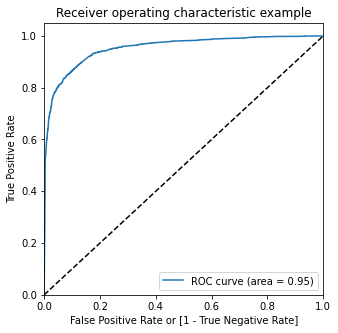

In [228]:

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

In [229]:
# Generating columns at probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.149820,0,1,1,0,0,0,0,0,0,0,0
1,1,0.941711,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989161,1,1,1,1,1,1,1,1,1,1,1
3,1,0.978726,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010864,0,1,0,0,0,0,0,0,0,0,0


In [230]:
# Creating a dataframe to check accuracy, sensitivity, and specificity at each probability cut off
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

# Making confusing matrix 
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,probability,accuracy,sensitivity,specificity
0.0,0.0,0.388683,1.000000,0.000000
0.1,0.1,0.769017,0.969769,0.641376
0.2,0.2,0.863791,0.933572,0.819423
0.3,0.3,0.882189,0.886635,0.879363
0.4,0.4,0.888064,0.855609,0.908700
0.5,0.5,0.891311,0.816229,0.939049
0.6,0.6,0.891775,0.785203,0.959535
0.7,0.7,0.881571,0.737072,0.973445
0.8,0.8,0.869048,0.692522,0.981285
0.9,0.9,0.838899,0.600239,0.990642


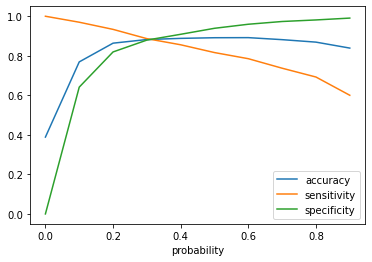

In [231]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

In [232]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.149820,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.941711,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.989161,1,1,1,1,1,1,1,1,1,1,1,1
3,1,0.978726,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.010864,0,1,0,0,0,0,0,0,0,0,0,0


In [233]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8857452071737786

In [234]:
# Creating confusion matrix 
Confusion_Matrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
Confusion_Matrix2

array([[3533,  421],
       [ 318, 2196]], dtype=int64)

In [235]:
# Substituting the value

#true positive
TP = Confusion_Matrix[1,1]

# true negatives
TN = Confusion_Matrix[0,0]

# false positives
FP = Confusion_Matrix[0,1] 

# false negatives
FN = Confusion_Matrix[1,0]

In [236]:
# Calculating sensitivity
TP/(TP+FN)

0.8162291169451074

In [237]:
# Calculating specificity
TN/(TN+FP)

0.9390490642387456

## 8. Prediction on Test set

In [238]:
#scaling variables
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [239]:
# Substituting all the variables in the final train model
cols = X_train.columns

In [240]:
X_test = X_test[cols]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[cols])
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Do Not Email_Yes,Last Activity_Olark Chat Conversation,Last Activity_Other,What is your current occupation_Other,What is your current occupation_Working Professional,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_SMS Sent
567,1.0,0.4,0.212548,0,0,0,0,0,0,0,1,0,0
2303,1.0,0.2,0.993598,0,0,0,0,1,0,0,0,0,0
1523,1.0,0.3,0.860435,0,0,0,0,0,0,0,0,0,0
6923,1.0,0.5,0.119718,0,0,0,0,0,0,0,0,0,0
7841,1.0,0.2,0.449424,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9124,1.0,0.2,0.170294,0,0,0,0,0,1,0,0,0,0
1049,1.0,0.8,1.000000,0,0,0,0,0,0,0,1,0,0
7778,1.0,0.2,0.195262,0,0,0,0,1,0,0,0,0,0
6432,1.0,0.0,0.000000,0,1,0,0,0,0,0,1,0,1


In [241]:
# Storing prediction on test set 
y_test_pred = res.predict(X_test_sm)

y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# append dataframes
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,Conversion_Probability
0,0,0.002893
1,0,0.514503
2,0,0.572197
3,0,0.120914
4,0,0.244432


In [242]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.8948975141735718

In [243]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.8162291169451074

## Findings
As per the model, following are the top three variables which contribute most towards the probability of a lead getting converted:
• Lead Origin
• Total time spent on website
• Tags

Following are top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion:
• Lead Origin – Lead form add
• Tags – Will revert after reading email
• Last Notable Activity - SMS Sent

#### A short term and long-term lead conversion augmentation strategy has been formulated for the company to pull the conversion rate from the current 30 per cent to 80 percent.

Short term strategy:
• Leads should be shortlisted based on the lead origin, total time spent on the website and tags such as interest in emails as these factors are most influential in conversion.
• Such leads when shared with the sales team are likely to increasing the efficiency and decrease the time utilized to convert a lead into customers.

Long term strategy:
• In the long term, the company can work on optimizing the website to add retention points to retain the customers.
• As per the data insights and consumer behaviour, running frequent email and SMS campaigns will also increase the lead conversion rate.